<center>
    <h1>Работа 5.5.5</h1>
    <h2>Компьютерная сцинтилляционная γ-спектрометрия</h2>
</center>
<br>
<hr>
<br>
<br>
<br>
<br>
<br>
<p style="text-align:right">
    Работу выполнил<br>
    студент группы Б02-012н<br>
    <b>Захаров Лев</b><br>
    Преподаватель:<br>
    <b>Светличный Александр Олегович</b><br>
</p>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<hr>
<p style="text-align:center">
    Долгопрудный 2022
</p>
<hr>

<h2>1. Аннотация</h2>
<hr>
<br>
<p style="text-align:justify">
    Измеряются $\gamma$-спектры <b>$^{60}$Co</b>, <b>$^{137}$Cs</b>, <b>$^{22}$Na</b>, <b>$^{241}$Am</b> и <b>$^{152}$Eu</b>. С их помощью построен калибровочный график зависимости номера канала от энергии, определена величина энергетического разрешения для каждого образца, проверены некоторые теоретические зависимости.
<p>

<h2>2. Теоретическое введение</h2>
<hr>
<br>
<p style="text-align:justify">
    В сцинтилляционном пластиковом детекторе световые вспышки возникают за счет взаимодействия электронов с материалом детектора. Рекомбинация электронов превращает их энергию в световые вспышки, яркость которых пропорциональна энергии возникающего электрона. Поэтому сцинтиллятор с присоединенным к нему на оптическом контакте ФЭУ служит спектрометром. Процессы взаимодействия гамма-квантов с веществом и основы сцинтилляционной спектрометрии подробно рассмотрены во введении к главе V и в Приложении II.6. <b>[1]</b>.
</p>

<h2>3. Экспериментальная установка</h2>
<hr>
<br>
<p style="text-align:justify">
    В этой работе для измерения спектров используется сцинциллятор с неорганическим кристаллом $NaI(Tl)$. Схематическое изображение установки приведены на рис. 1a.
</p>
<p style="text-align:right">
    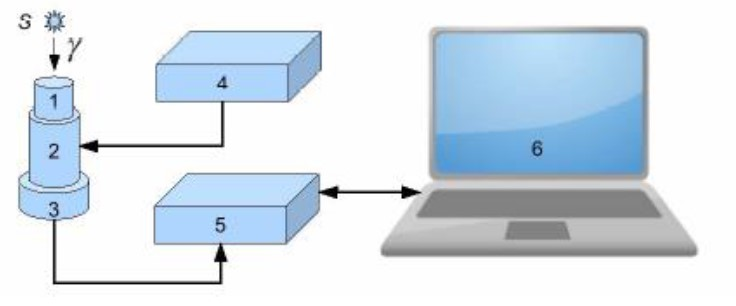
    Рис.1 Экспериментальная установка.
</p>
<p style="text-align:justify">
    На этом рисунке: 1 – сцинтиллятор, 2 – ФЭУ, 3 – предусилитель импульсов, 4 – высоковольтный блок питания для ФЭУ, 5 – блок преобразования аналоговых импульсов с ФЭУ в цифровой код (АЦП), 6 – компьютер для сбора данных, их обработки и хранения.
</p>

<h2>4. Программная часть</h2>
<hr>
<br>
<p style="text-align:justify">
    В работе будет анализироваться по одному и тому же шаблону большое количество данных, которые собраны в одном и том же виде, для уменьшения вероятности ошибок в следюущем блоке кода будут собраны функции, которые потом будут вызываться при анализе 
</p>

In [1]:
# Подключение необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

# Реализация вывода данных из памяти

def draw_raw(df, TITLE):
    plt.figure(figsize=(16, 10))

    plt.errorbar(df['Channel'], df['Counts'], fmt = 'x')
    plt.title(TITLE, fontsize=22)
    plt.xlabel('Channel', fontsize = 18)
    plt.ylabel('Counts', fontsize = 18)
    plt.show()
    
# Реализация МНК для разных функций

def G(x, a, x0, s):
    return a*np.exp(-(x-x0)**2/(2*s**2))

def L(x, k, b):
    return k*x + b

def P(x, a, x0, c):
    return a*(x-x0)**2 + c

def LS_fit(df, func, p0):
    dfx = list(df['Channel'])
    dfy = list(df['Counts'])
    
    popt, pcov = curve_fit(func, dfx, dfy, p0)
    perr = np.sqrt(np.diag(pcov))
    
    return popt, perr

# Отрисовка итоговых графиков

def draw_gauss(df, a, x0, s, dx0, FWHM, TITLE):
    data_err = 0.01 * df['Counts']
    dy0 = G(dx0, a, 0, s)
    
    l = int(1.5*FWHM)
    x_gauss = np.array([i for i in range(int(x0-l), int(x0+l))])
    y_gauss = G(x_gauss, a, x0, s)
    
    x_pt = np.array([x0])
    y_pt = G(x_pt, a, x0, s)
    
    plt.figure(figsize=(16, 10))

    plt.errorbar(df['Channel'], df['Counts'], yerr = data_err, xerr = 1, fmt = '.')
    plt.plot(x_gauss, y_gauss, 'r--', label = 'Аппроксимирующая гауссиана')
    plt.scatter(x_pt, y_pt, color='r')
    plt.errorbar(x_pt, y_pt, yerr = dy0, xerr=dx0, fmt="o", color="r", label = 'Среднее значение')
    plt.title(TITLE, fontsize=22)
    plt.xlabel('Channel', fontsize = 18)
    plt.ylabel('Counts', fontsize = 18)
    plt.show()

<h2>5. Исследование спектра разных источников</h2>
<hr>
<br>

<h4>5.1 Фоновое излучение</h4>
<hr>
<br>

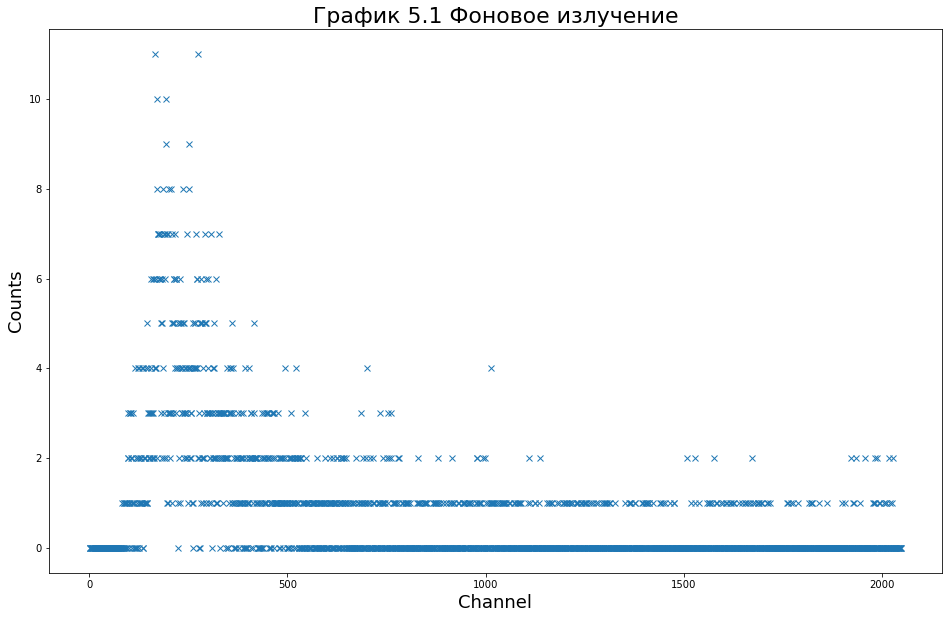

In [2]:
data_back = pd.read_csv("Data\Background.csv", dtype = {'Channel':np.longlong, 'Counts':np.longlong})

draw_raw(data_back, 'График 5.1 Фоновое излучение')

Names = []
Channels = []
FWHMs = []

<p style="text-align:justify">
    Как мы увидим в дальнейшем, средняя амплитуда спектра фонового шума отличается на 3 порядка от амплитуды пиков, которые мы меряем, из чего следует вывод, что наша установка хорошо изолирована от внешних частиц.
</p>

<h4>5.2 Излучение Co-60</h4>
<hr>
<br>

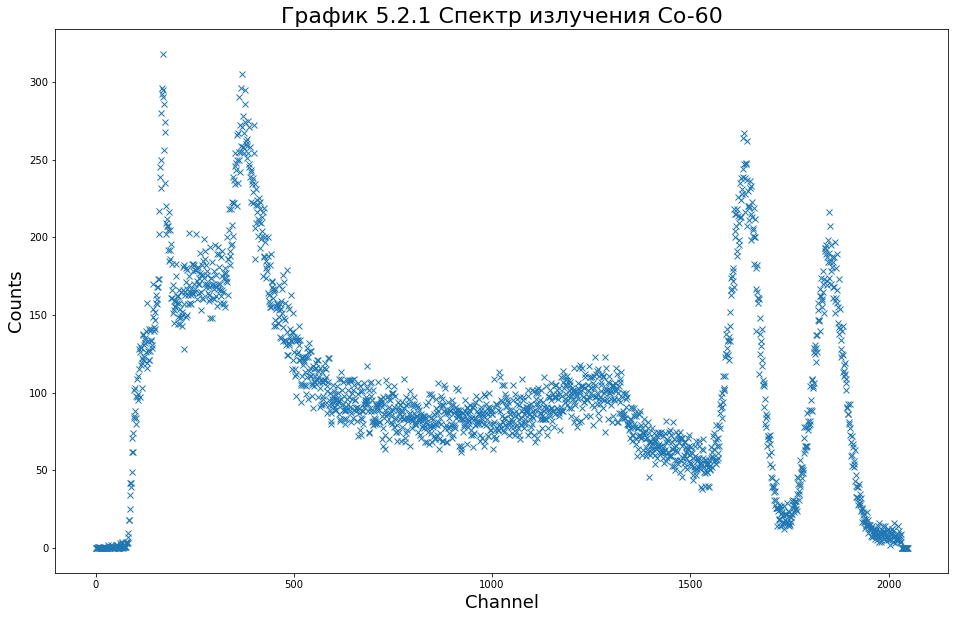

In [3]:
data_Co = pd.read_csv("Data\Co-60.csv", dtype = {'Channel':np.longlong, 'Counts':np.longlong})

draw_raw(data_Co, 'График 5.2.1 Спектр излучения Co-60')

<p style="text-align:justify">
    На графике 2.1 приведен в качестве примера спектр, полученный при регистрации сцинтилляционным гамма-спектрометром гамма-квантов, излучаемых радиоактивным $^{60}$Co. При β-распаде $^{60}$Co образуется радиоактивный $^{60}$Ni в возбужденных состояниях с энергиями 2,505 МэВ или 1,332 МэВ (рис.2). Распад
высокоэнергетичного состояния происходит преимущественно на первый возбужденный уровень, при этом испускается гамма квант с энергией 1,173 МэВ, затем происходит переход в основное состояние с испусканием гамма-кванта с энергией 1,332 МэВ.
</p>
<p style="text-align:right">
    <img src=" 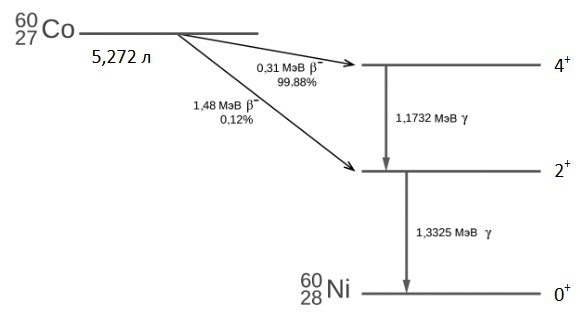" title="Рис.1 Схема распада Co-60."/>
    Рис.2 Схема распада Co-60
</p>
<p style="text-align:justify">
    Важные для получения калибровочного графика пики - два последних. Определим положения их вершин.
</p>

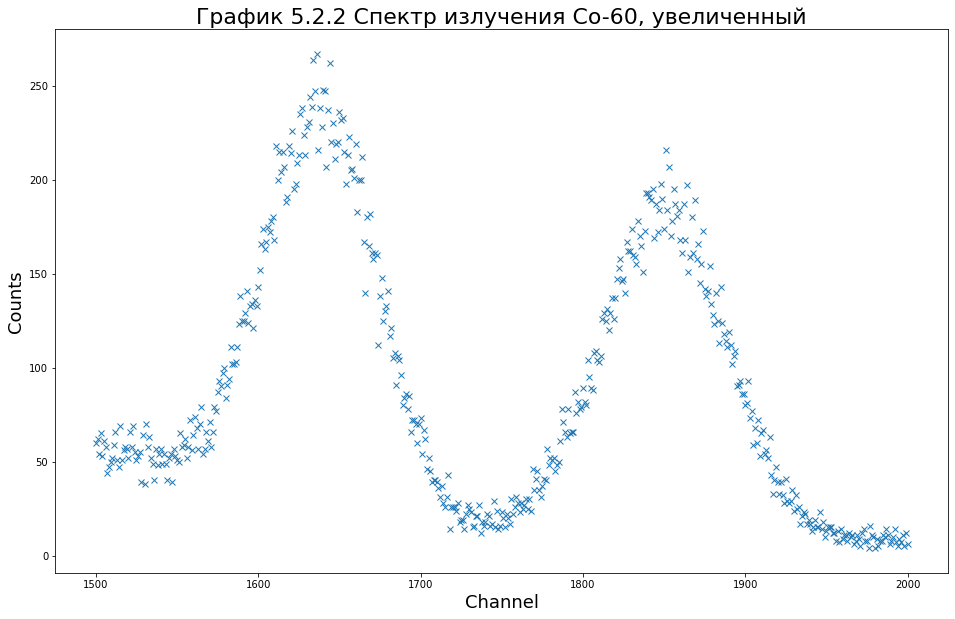

In [4]:
draw_raw(data_Co[1499:2000], 'График 5.2.2 Cпектр излучения Co-60, увеличенный')

Вершина пика находится на канале 1850
Полуширина пика 98 каналов


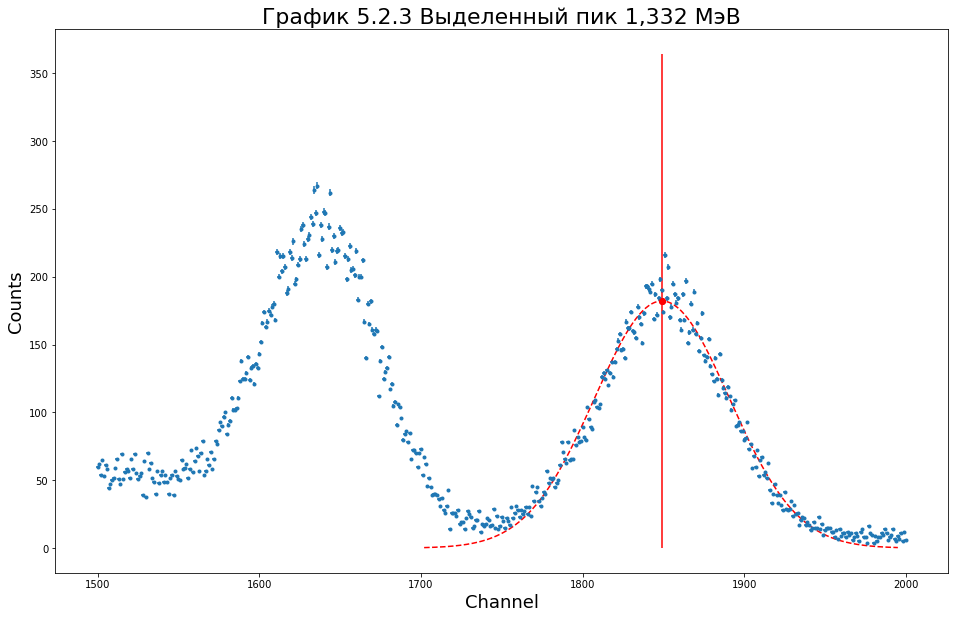

In [5]:
# Для пика 1,332 МэВ
p0 = [210,1845,100] 
popt, perr = LS_fit(data_Co[1729:1960], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Co-60')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Co[1499:2000], a, x0, s, dx0, FWHM, 'График 5.2.3 Выделенный пик 1,332 МэВ')

Вершина пика находится на канале 1636
Полуширина пика 96 каналов


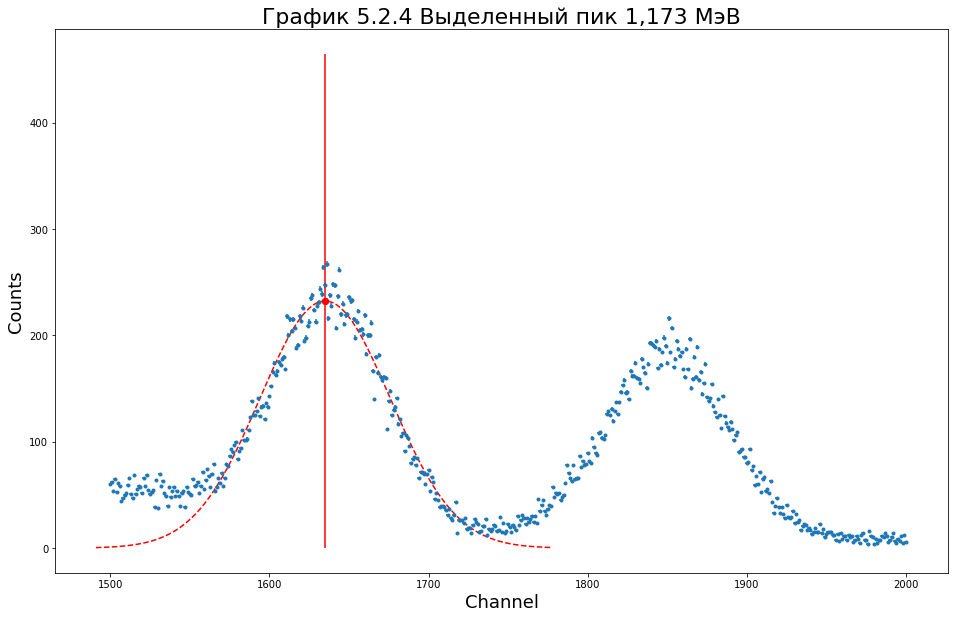

In [6]:
# Для пика 1,173 МэВ
p0 = [210,1640,50] 
popt, perr = LS_fit(data_Co[1549:1730], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Co-60')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Co[1499:2000], a, x0, s, dx0, FWHM, 'График 5.2.4 Выделенный пик 1,173 МэВ')

<h4>5.3 Cs-137</h4>
<hr>
<br>

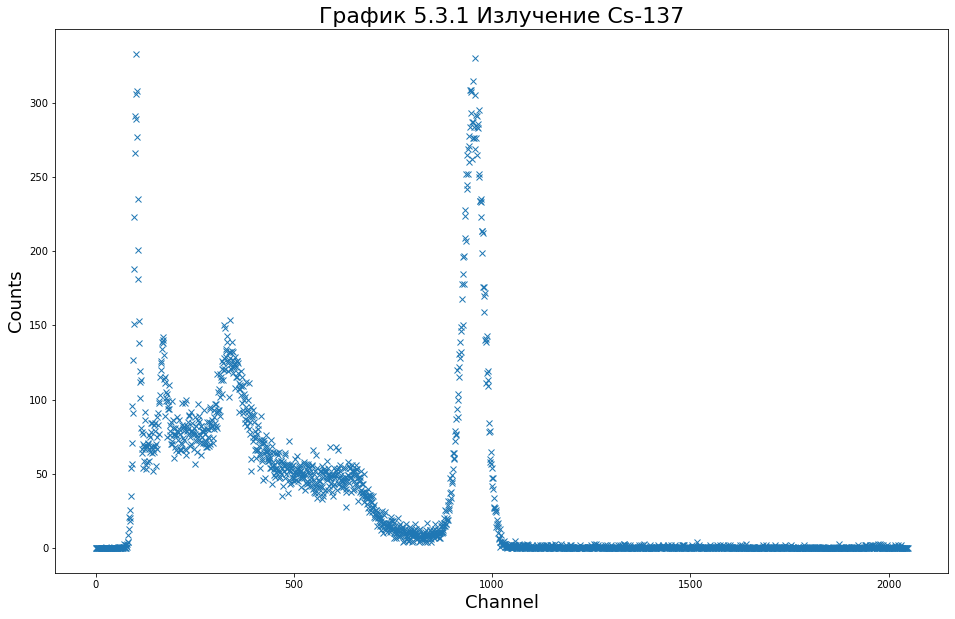

In [7]:
data_Cs = pd.read_csv("Data\Cs-137.csv", dtype = {'Channel':np.longlong, 'Counts':np.longlong})

draw_raw(data_Cs, 'График 5.3.1 Излучение Cs-137')

<p style="text-align:justify">
    На графике 3.1 приведен спектр, зарегистрированный от радиоактивного изотопа $^{137}$Cs. Ядро $^{137}$Cs испытывает β-распад, в результате которого образуется ядро $^{137}$Ba. Большинство распадов происходит на первый возбужденный
метастабильный уровень ядра $^{137m}$Ba (индекс m означает метастабильное состояние). При переходе возбужденного ядра $^{137m}$Ba в основное состояние испускаются гамма кванты с энергией 0,6617 МэВ. 
</p>
<p style="text-align:right">
    <img src=" 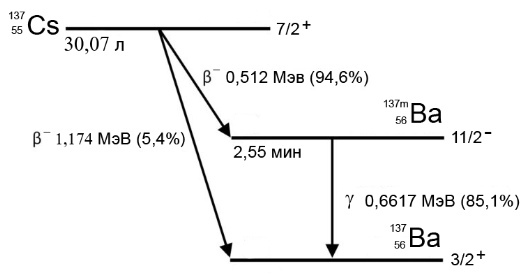" title="Рис.3 Схема распада Cs-137."/>
    Рис.2 Схема распада Cs-137
</p>
<p style="text-align:justify">
    По графику определяем пик:
</p>

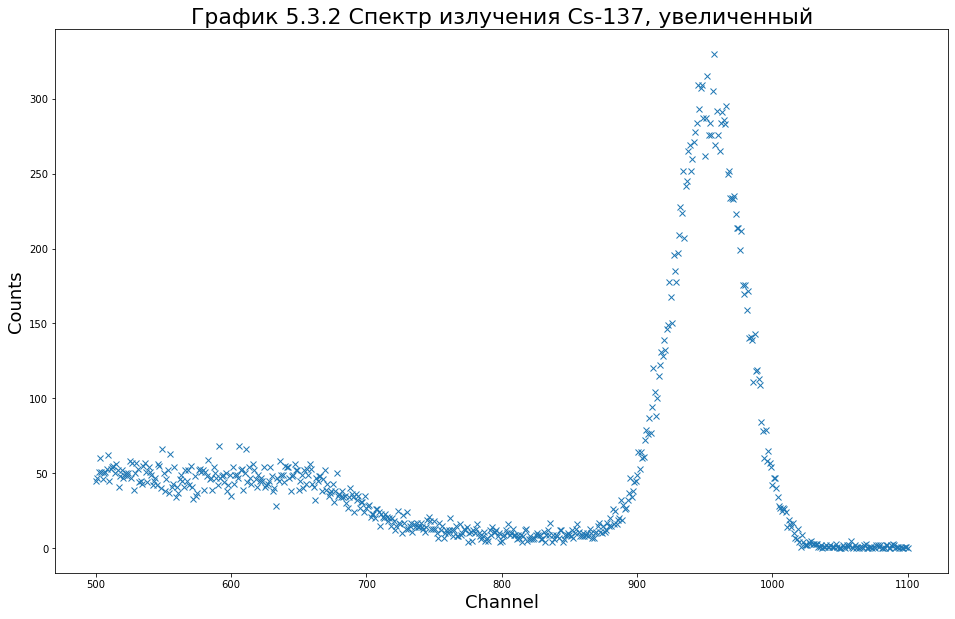

In [8]:
draw_raw(data_Cs[499:1100], 'График 5.3.2 Спектр излучения Cs-137, увеличенный')

Вершина пика находится на канале 953
Полуширина пика 61 каналов


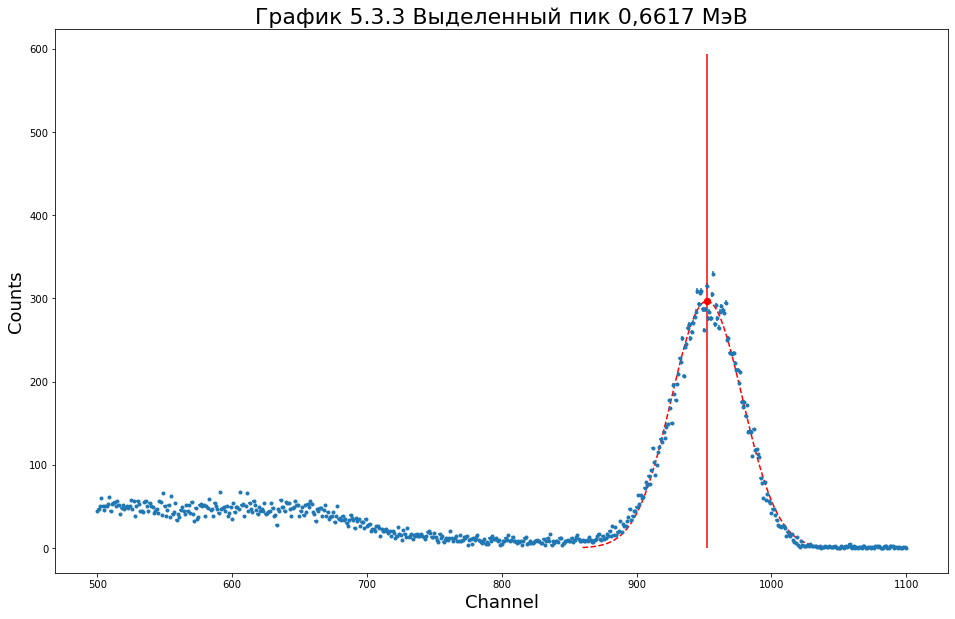

In [9]:
# Для пика 0,6617 МэВ
p0 = [320,950,30] 
popt, perr = LS_fit(data_Cs[849:1050], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Cs-137')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Cs[499:1100], a, x0, s, dx0, FWHM, 'График 5.3.3 Выделенный пик 0,6617 МэВ')

<h4>5.4 Построение калибровочной зависимости</h4>
<hr>
<br>

<p style="text-align:justify">
    Для сцинтилляционного детектора номер канала пропорционален энергии электронов, поэтому зная номер канала $N_k$ и энергию $E_k$ конверсионных электронов, можно построить линейную калибровочную зависимость энергии $E_i$ от номера канала $N_i$: $E_i = a N_i$.
</p>
<p style="text-align:justify">
    Рассмотрим полученные данные:
</p>
<table>
    <tr>
        <th>Элемент</th> <th>Номер канала</th> <th>Энергия<th>
    </tr>
    <tr>
        <td>Cs-137</td>  <td>953</td>          <td>0,6617 МэВ</td>
    </tr>
    <tr>
        <td>Co-60</td>   <td>1636</td>         <td>1,137 МэВ</td>
    </tr>
    <tr>
        <td>Co-60</td>
        <td>1850</td>
        <td>1,332 МэВ</td>
    </tr>
</table>
<p style="text-align:right">
    Таблица 1. Данные для построения калибровочной зависимости
</p>

In [10]:
Ch = [952, 1635, 1849]
En = [0.6617, 1.137, 1.332]
p0 = [1e-4, 0]

popt, pcov = curve_fit(L, Ch, En, p0)
k, b = map(float, popt)
perr = np.sqrt(np.diag(pcov))
dk, db = map(float, perr)
dkm = max(dk, k - (1.332-0.6617)/float(1850-951))
dkM = max(dk, (1.332-0.6617)/float(1849-953) - k)
print(k, dk)

0.0007347736452926938 4.1392126082941254e-05


<p style="text-align:justify">
    Получаем зависимость с калибровочным коэффициентом $k = (7,3±0,4)×10^{-1} кЭв/канал$.
</p>

<h4>5.5 Излучение Am-241</h4>
<hr>
<br>

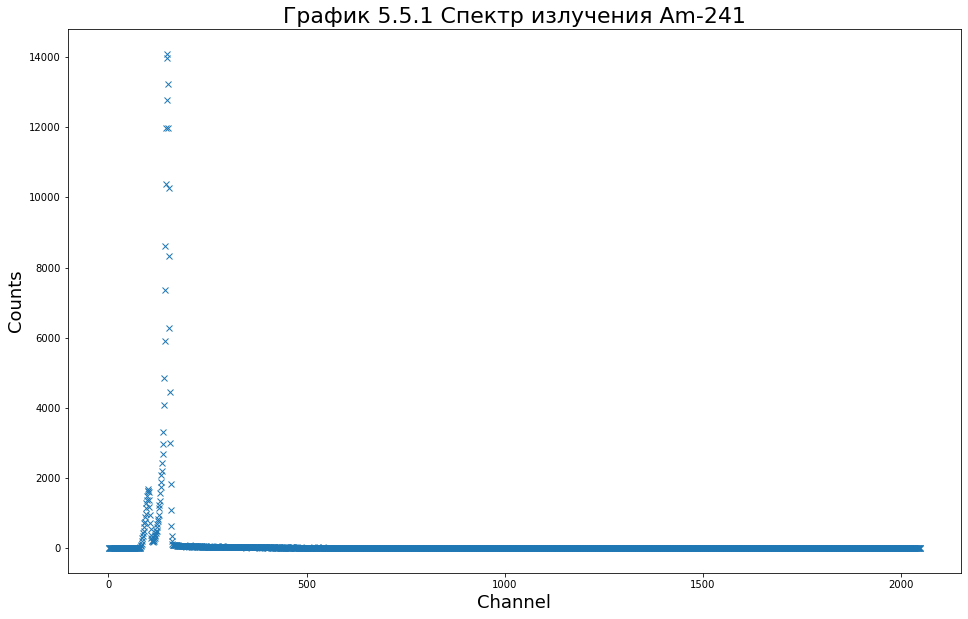

In [11]:
data_Am = pd.read_csv("Data\Am-241.csv", dtype = {'Channel':np.longlong, 'Counts':np.longlong})

draw_raw(data_Am, 'График 5.5.1 Спектр излучения Am-241')

<p style="text-align:justify">
    На графике 4.1 приведен спектр, зарегистрированный от радиоактивного изотопа $^{241}$Am. Ядро $^{241}$Am испытывает α-распад, в результате которого образуется ядро $^{237}$Np. Большинство распадов происходит на первый возбужденный метастабильный уровень ядра $^{237m}$Np. При переходе возбужденного ядра $^{237m}$Np в основное состояние испускаются гамма кванты с энергией 0,0595 МэВ. 
</p>

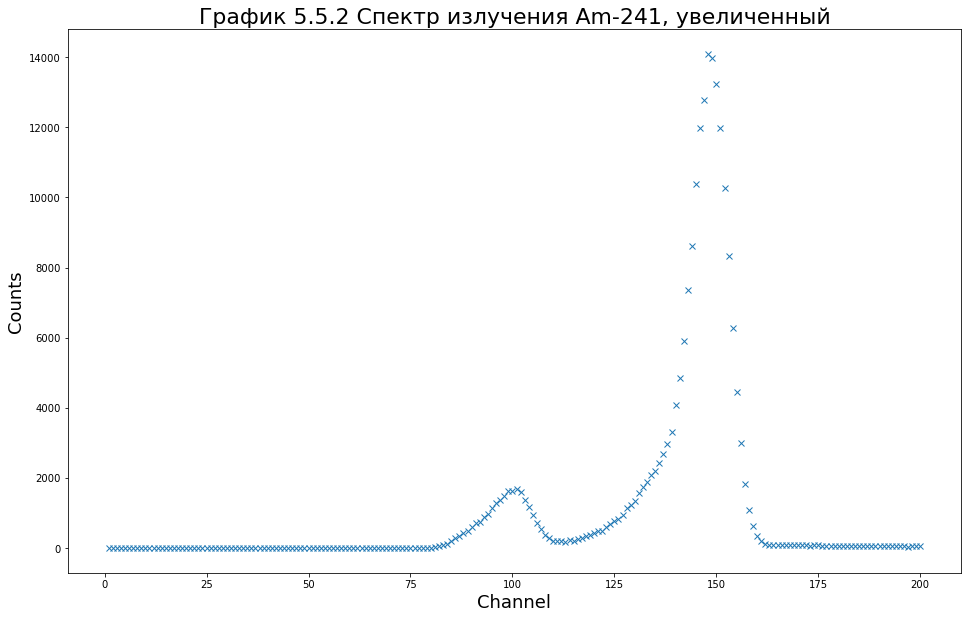

In [12]:
draw_raw(data_Am[0: 200], 'График 5.5.2 Спектр излучения Am-241, увеличенный')

<p style="text-align:justify">
    Пик в районе 130-150 каналов - пик с энергией 0.0595 МэВ. Определим его характеристики
</p>

Вершина пика находится на канале 149
Полуширина пика 11 каналов


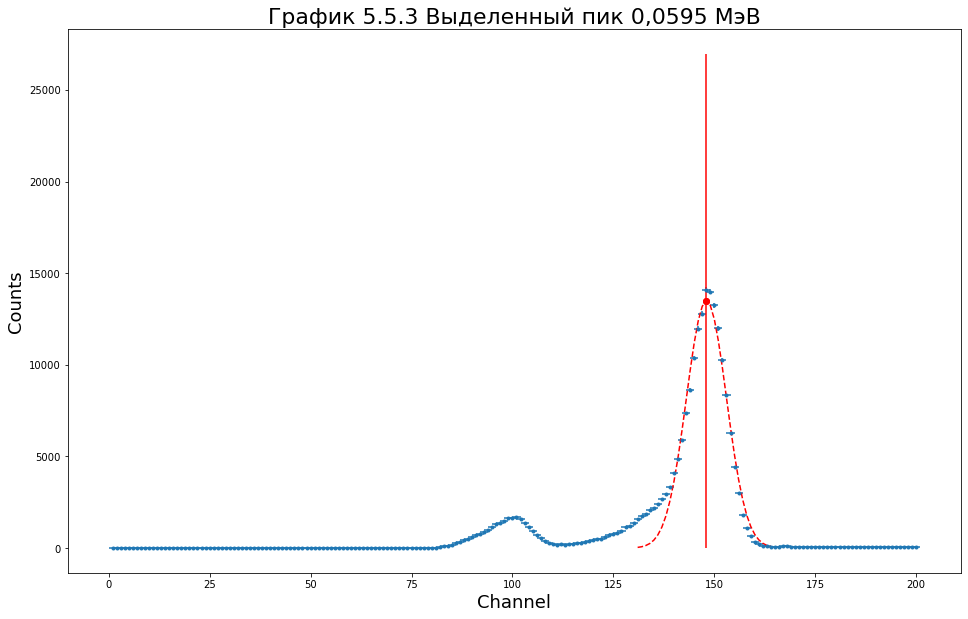

In [13]:
# Для пика 0,0595 МэВ
p0 = [14000,149,10] 
popt, perr = LS_fit(data_Am[125:175], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Am-241')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Am[0: 200], a, x0, s, dx0, FWHM, 'График 5.5.3 Выделенный пик 0,0595 МэВ')

<h4>5.6 Излучение Eu-152</h4>
<hr>
<br>

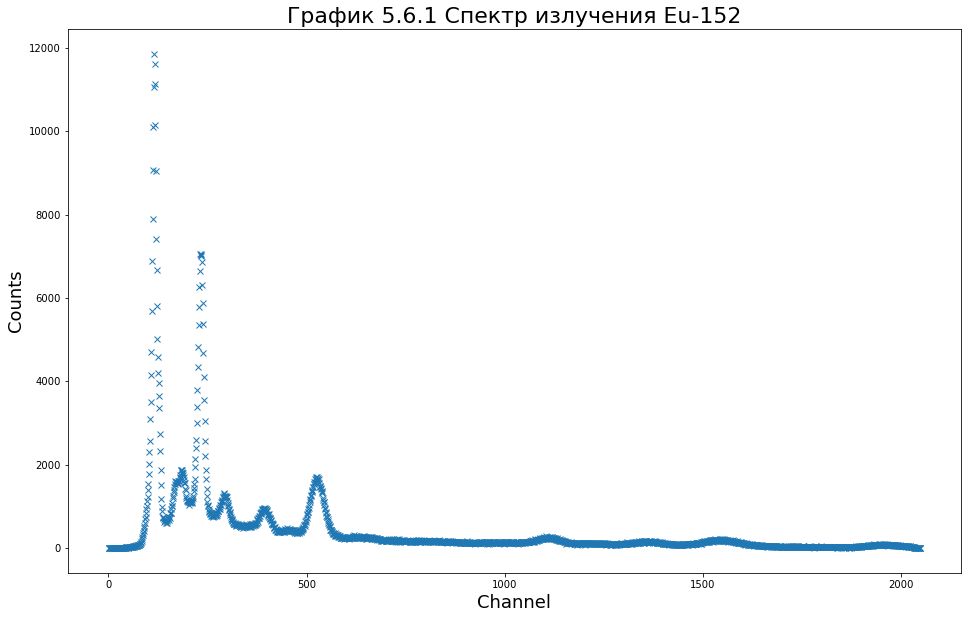

In [14]:
data_Eu = pd.read_csv("Data\Eu-152.csv", dtype = {'Channel':np.longlong, 'Counts':np.longlong})

draw_raw(data_Eu, 'График 5.6.1 Спектр излучения Eu-152')

<p style="text-align:justify">
    На графике 6.1 приведен спектр, зарегистрированный от радиоактивного изотопа $^{152}$Eu. Ядро $^{152}$Eu обладает большим количеством метастабильных состояний, время жизни которых много меньше, чем время выполнения данной работы, потому главным образом интересны несколько пиков. Большинство распадов происходит на основное состояние ядра и через механизм электронного захвата переходит в $^{152}$Sm, либо по β-распаду переходит в $^{153}$Gd. При переходе возбужденного ядра $^{152m1}$Eu по аналогичным механизмам образуются те же ядра, что объясняет наличие близких друг к другу пиков. Исследуем те пики, которые не являются "пиками суммы", то есть пиками, соответствующим каналам с суммами энергий отдельных квантов, попавших в сцинциллятор одновременно. 
</p>

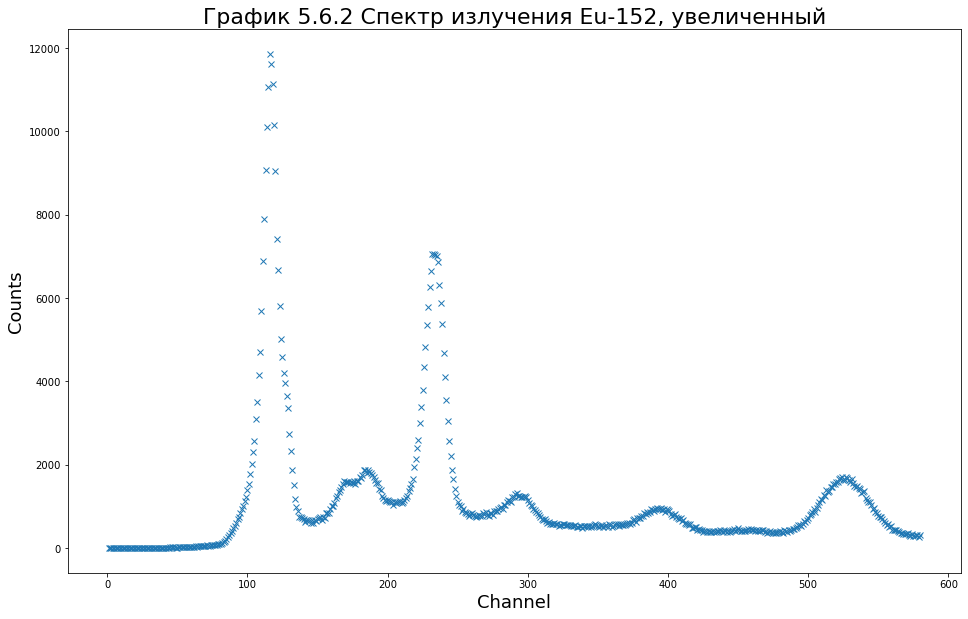

In [15]:
draw_raw(data_Eu[0:580], 'График 5.6.2 Спектр излучения Eu-152, увеличенный')

Вершина пика находится на канале 526
Полуширина пика 51 каналов


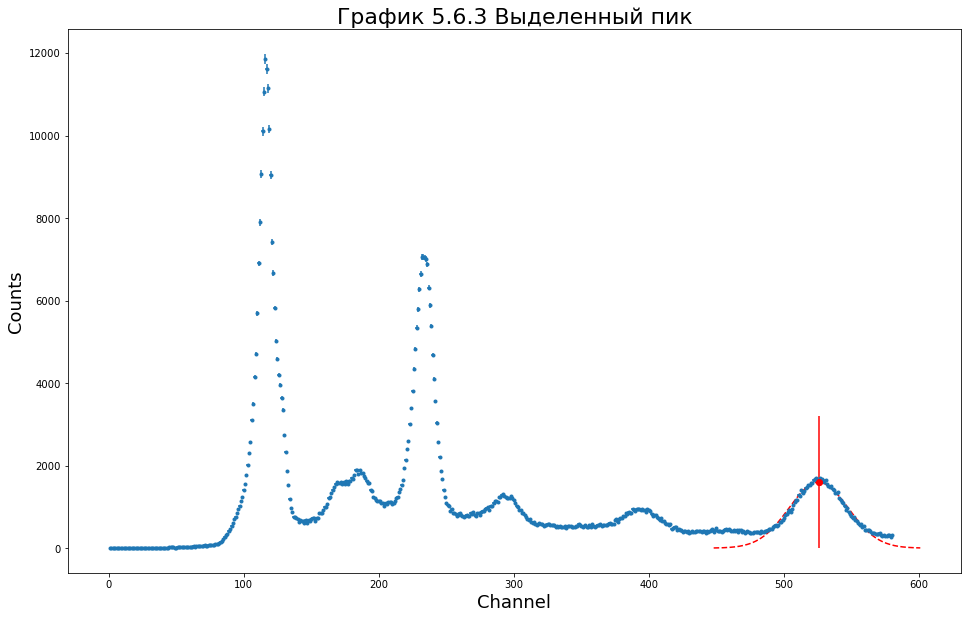

In [16]:
p0 = [2000,525,15] 
popt, pcov = LS_fit(data_Eu[479:570], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Eu-152')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Eu[0:580], a, x0, s, dx0, FWHM, 'График 5.6.3 Выделенный пик')

Вершина пика находится на канале 234
Полуширина пика 20 каналов


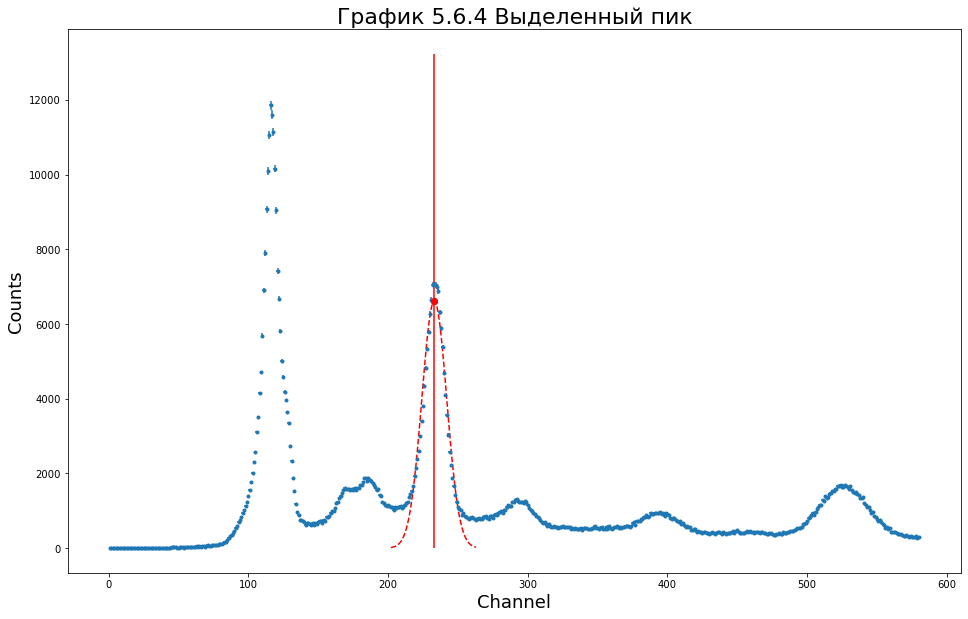

In [17]:
p0 = [7000,240,10] 
popt, perr = LS_fit(data_Eu[204:275], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Eu-152')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Eu[0:580], a, x0, s, dx0, FWHM, 'График 5.6.4 Выделенный пик')

Вершина пика находится на канале 117
Полуширина пика 16 каналов


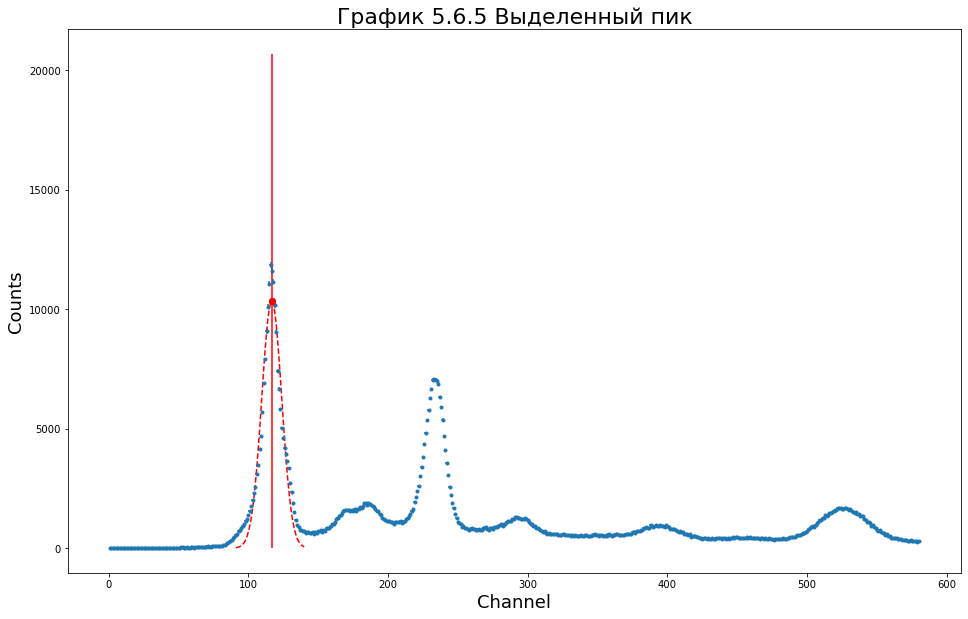

In [18]:
p0 = [12000,115,10] 
popt, perr = LS_fit(data_Eu[84:145], G, p0)
a, x0, s = map(float, popt)
FWHM = 2*np.sqrt(2*np.log(2))*s
da, dx0, ds = map(float, perr)

print("Вершина пика находится на канале", int(x0)+1)
print("Полуширина пика", int(FWHM), "каналов")
Names.append('Eu-152')
Channels.append(int(x0)+1)
FWHMs.append(int(FWHM))
draw_gauss(data_Eu[0:580], a, x0, s, dx0, FWHM, 'График 5.6.5 Выделенный пик')

<h2>6. Обработка результатов</h2>
<hr>
<br>

<h4>6.1 Исследование калибровочной зависимости</h4>
<hr>
<br>

<p style="text-align:justify">
    По результатам исследования спектров различных радиоактивных ядер собраны данные, которые представлены в таблице ниже:
</p>

In [19]:
#Names.append('Co-60')
#Channels.append(int(x0)+1)
#FWHMs.append(int(FWHM))
Energies = list(map(lambda n: k*float(n) + b, Channels))
DEnergies = list(map(lambda n: k*float(n) + b, FWHMs))
Rs = list(map(lambda x, y: x/y, DEnergies, Energies))

d = {
    'Источник': Names,
    'Номер канала N': Channels,
    'Энергия поглощения E, МэВ': Energies,
    'Полуширина ΔN в каналах': FWHMs,
    'Энергия полуширины ΔE, МэВ': DEnergies,
    'Разрешающая способность R': Rs
}
df = pd.DataFrame(data = d)

display(df)

,Источник,Номер канала N,"Энергия поглощения E, МэВ",Полуширина ΔN в каналах,"Энергия полуширины ΔE, МэВ",Разрешающая способность R
0,Co-60,1850,1.316413,98,0.029089,0.022097
1,Co-60,1636,1.159171,96,0.027620,0.023827
2,Cs-137,953,0.657321,61,0.001903,0.002894
3,Am-241,149,0.066563,11,-0.034836,-0.523358
4,Eu-152,526,0.343572,51,-0.005445,-0.015849
5,Eu-152,234,0.129018,20,-0.028223,-0.218753
6,Eu-152,117,0.043050,16,-0.031162,-0.723864


<p style="text-align:right">
    Таблица 2. Данные спектров
</p>
<p style="text-align:justify">
    Стоит отметить высокую точность калибровочной зависимости для определения энергий поглощения:
</p>
<p style="text-align:center">
    \begin{equation}
        \delta_{Co-60}^{max} = 0.011;
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        \delta_{Cs-137}^{max} = 6.6 \cdot 10^{-3};
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        \delta_{Am-241}^{max} = 0.012;
    \end{equation}
</p>
<p style="text-align:center">
    \begin{equation}
        \delta_{Eu-152}^{max} = 0.058;
    \end{equation}
</p>
<p style="text-align:justify">
    Сам калибровочный график вместе с экспериментальными точками представлен на графике 7.1
</p>

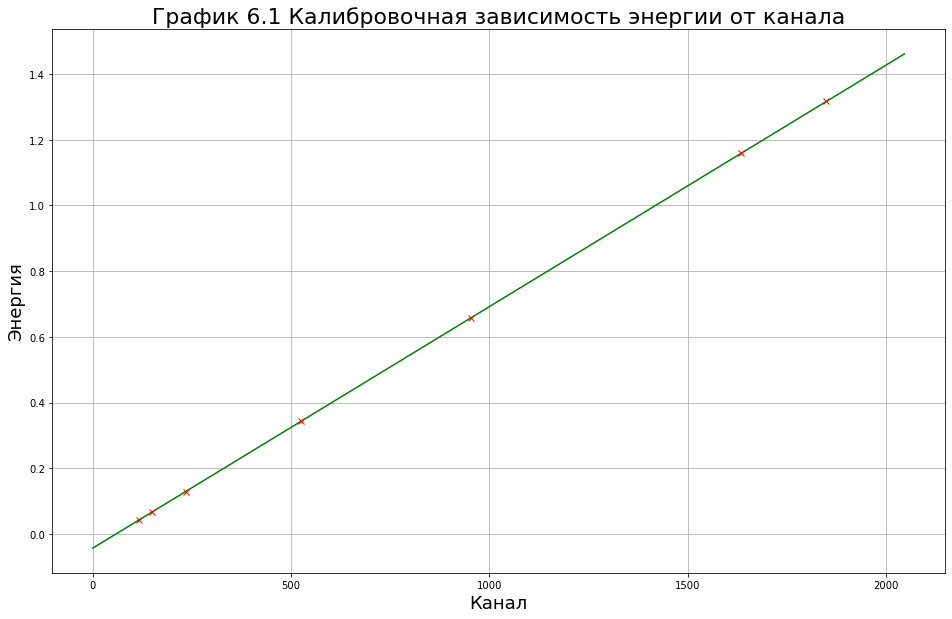

In [37]:
x_l = np.array([i for i in range(0, 2048)])
y_l = k * x_l + b

x_pt = np.array(Channels)
y_pt = np.array(Energies)

plt.figure(figsize=(16, 10))
plt.grid(visible=1, which='both', axis='both')
plt.plot(x_l, y_l, color='g')
plt.errorbar(x_pt, y_pt, fmt="x", color="r", label = 'Среднее значение')
plt.title('График 6.1 Калибровочная зависимость энергии от канала', fontsize=22)
plt.xlabel('Канал', fontsize = 18)
plt.ylabel('Энергия', fontsize = 18)
plt.show()

<h4>6.2 Проверка теоретической зависимости</h4>
<hr>
<br>

<p style="text-align:justify">
    По данным таблицы 2 построен график зависимости $R^2 = f(\frac{1}{E})$:
</p>

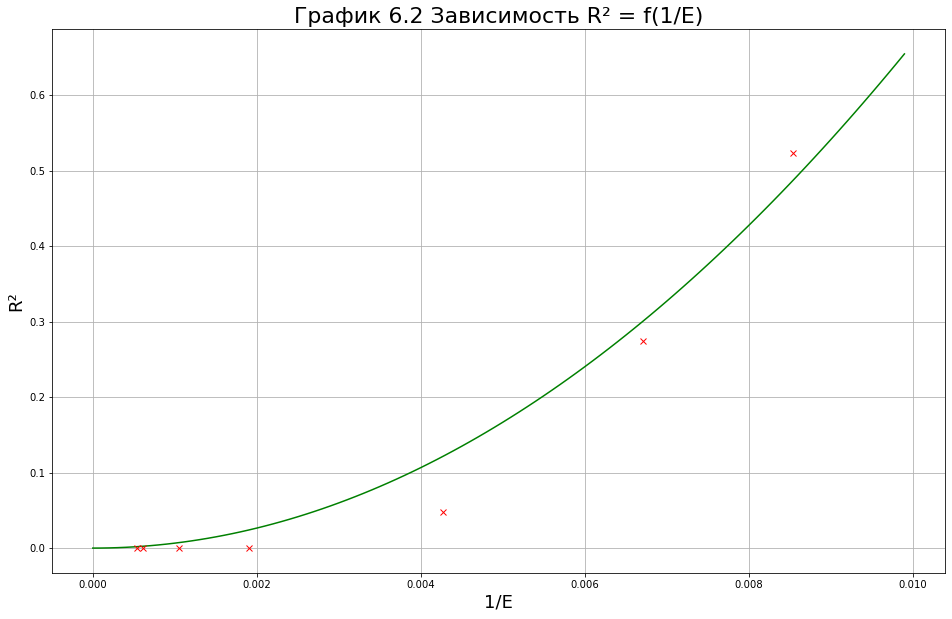

In [36]:
x_pt = np.array(Channels)
x_pt = 1 / x_pt
y_pt = np.array(Rs)
y_pt = y_pt * y_pt

p0 = [10000,0,0]
popt, pcov = curve_fit(P, x_pt, y_pt, p0, bounds = ([-np.inf, -0.00001, -0.00001], [np.inf, 0.00001, 0.00001]))
a, x0, c = map(float, popt)

x_p = np.array([i for i in range(0, 100)])
x_p = x_p / 10000.0
y_p = P(x_p, a, x0, c)

plt.figure(figsize=(16, 10))
plt.grid(visible=1, which='both', axis='both')
plt.plot(x_p, y_p, color='g')
plt.errorbar(x_pt, y_pt, fmt="x", color="r")
plt.title('График 6.2 Зависимость R² = f(1/E)', fontsize=22)
plt.xlabel('1/E', fontsize = 18)
plt.ylabel('R²', fontsize = 18)
plt.show()

<p style="text-align:justify">
    Заметно, что данные аппроксимируются квадратичной функцией не очень хорошо, что показывает, что теоретическая зависимость грубо приближает действительность. Причина этому понятна - реальные распределения, описывающие фотопики, не являются гауссовыми, что приводит к накоплению ошибки.
</p>

<h4>6.3 Исследование обратного рассеяния</h4>
<hr>
<br>

<p style="text-aligned:justify">
    В спектрах $^{60}$Co, $^{137}$Cs и $^{241}$Am наблюдаются пики обратного рассеяния, которые образуются в результате детектирования фотонов с энергиями $E_\gamma >> mc^2$, рассеяными на большие углы на материлах конструктивных деталей детектора и защиты. Теоретическая зависимость энергии пика обратного рассеяния от фотопика определяется выражением
</p>
<p style="text-aligned:center">
    \begin{equation}
        \displaystyle E_{обр.} = \frac{E}{1+ \displaystyle \frac{2E}{mc^2}};
    \end{equation}
</p>
<p style="text-aligned:justify">
    Проверим эту зависимость на указанных спектрах:
</p>

В спектре Co-60 пик обратного рассеяния находится на 378 канале
Энергия этого пика 0.23435802869796035 ± 0.34546622620073836 МэВ

В спектре Cs-137 пик обратного рассеяния находится на 341 канале
Энергия этого пика 0.2073753977657503 ± 0.305691238619103 МэВ

В спектре Cs-137 пик обратного рассеяния находится на 100 канале
Энергия этого пика 0.02984428209775055 ± 0.043993336039141503 МэВ


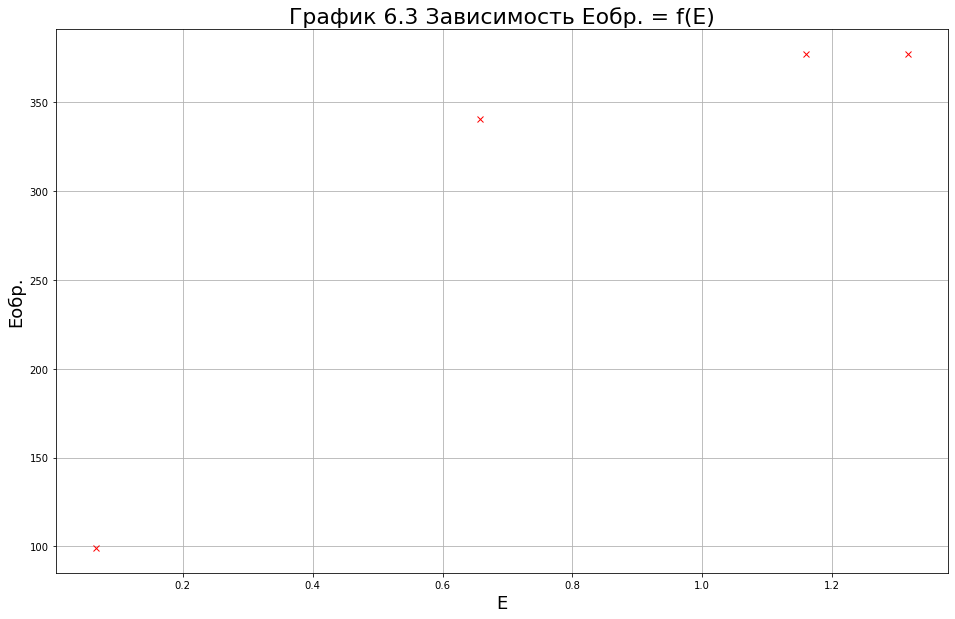

In [35]:
# Co-60
p0 = [300,375,20] 
popt, perr = LS_fit(data_Co[324:425], G, p0)
x0_Co = float(popt[1])
dx0_Co = float(perr[1])

print("В спектре Co-60 пик обратного рассеяния находится на", int(x0_Co)+1, "канале")

E_Co = k * x0_Co + b
dE_Co = E_Co * np.sqrt((dk/k)**2 + (db/b)**2)

print("Энергия этого пика", E_Co, "±", dE_Co, "МэВ")
print("")

# Cs-137
p0 = [150,375,20] 
popt, perr = LS_fit(data_Cs[274:400], G, p0)
x0_Cs = float(popt[1])
dx0_Cs = float(perr[1])

print("В спектре Cs-137 пик обратного рассеяния находится на", int(x0_Cs)+1, "канале")

E_Cs = k * x0_Cs + b
dE_Cs = E_Cs * np.sqrt((dk/k)**2 + (db/b)**2)

print("Энергия этого пика", E_Cs, "±", dE_Cs, "МэВ")
print("")

# Am-241
p0 = [2000,100,10] 
popt, perr = LS_fit(data_Am[75:113], G, p0)
x0_Am = float(popt[1])
dx0_Am = float(perr[1])

print("В спектре Cs-137 пик обратного рассеяния находится на", int(x0_Am)+1, "канале")

E_Am = k * x0_Am + b
dE_Am = E_Am * np.sqrt((dk/k)**2 + (db/b)**2)

print("Энергия этого пика", E_Am, "±", dE_Am, "МэВ")

# построение графика зависимости

x_pt = np.array(Energies[:4])
dx_pt = x_pt * np.sqrt ((dk/(k*x_pt))**2 + (db/b)**2)
y_pt = [x0_Co, x0_Co, x0_Cs, x0_Am]
dy_pt = [dx0_Co, dx0_Co, dx0_Cs, dx0_Am]

plt.figure(figsize=(16, 10))
plt.grid(visible=1, which='both', axis='both')
plt.errorbar(x_pt, y_pt, fmt="x", color="r")
plt.title('График 6.3 Зависимость Eобр. = f(E)', fontsize=22)
plt.xlabel('E', fontsize = 18)
plt.ylabel('Eобр.', fontsize = 18)
plt.show()

<h2>7. Выводы</h2>
<hr>
<br>

<p style="text-aligned:justify">
    В ходе работы после калибровки прибора были сняты спектры образцов $^{60}$Cо, $^{137}$Cs, $^{241}$Am, $^{152}$Eu. В спектрах были исследованы пики, соответствующие следующим взаимодействиям гамма-квантов с веществом:
    <ul>
        <li>фотоэффект (пики полного поглощения)</li>
        <li>обратное рассеяние (пики обратного рассеяния)</li>
    </ul>
</p>
<p style="text-aligned:justify">
    Полученный калибровочный график даёт относительную погрешность при переводе канала сцинциллятора в энергию не более $\delta^{max} = 6\%$
</p>
<p style="text-aligned:justify">
    Проверены теоретические зависимости разрешающей способности от энергии фотопика и энергии обратного рассеивания от энергии фотопика. В пределах погрешности данные зависимости совпадают
</p>